### CNN with MNIST dataset

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [4]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.9137 - loss: 0.2852
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9860 - loss: 0.0430
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9918 - loss: 0.0257
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9935 - loss: 0.0191
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9954 - loss: 0.0153


In [9]:
# Evaluate the model
loss, acc = model.evaluate(x_test, y_test)
print("Loss :",loss)
print("Accuracy :",acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9868 - loss: 0.0446
Loss : 0.03254792466759682
Accuracy : 0.9901000261306763


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Probabilities: [[8.6521457e-09 9.9999785e-01 6.5293997e-09 3.9547796e-12 7.0259858e-07
  3.2068155e-09 6.0823684e-09 1.1788214e-06 2.3642848e-07 1.7020366e-08]]
Predicted digit: 1
Actual digit: 1


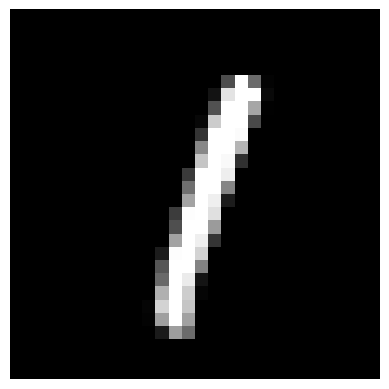

In [10]:
i = 5   # any test index

img = x_test[i]

prediction = model.predict(img.reshape(1,28,28,1))

print("Probabilities:", prediction)
print("Predicted digit:", np.argmax(prediction))
print("Actual digit:", y_test[i])

plt.imshow(img.squeeze(), cmap='gray')
plt.axis('off')
plt.show()
